In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = r"/content/drive/MyDrive/flowers"
IMAGE_SIZE = 227

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.1
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.1
)

train = train_datagen.flow_from_directory(
    base_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    subset = 'training'
)

validation = validation_datagen.flow_from_directory(
    base_dir,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    subset = 'validation'
)

Found 670 images belonging to 10 classes.
Found 71 images belonging to 10 classes.


In [ ]:
print(type(train_datagen), type(validation_datagen))
print(type(train), type(validation))

<class 'keras.preprocessing.image.ImageDataGenerator'> <class 'keras.preprocessing.image.ImageDataGenerator'>
<class 'keras.preprocessing.image.DirectoryIterator'> <class 'keras.preprocessing.image.DirectoryIterator'>


In [ ]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 10)
Image Size of first image :  (227, 227, 3)
Output of first image :  (10,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

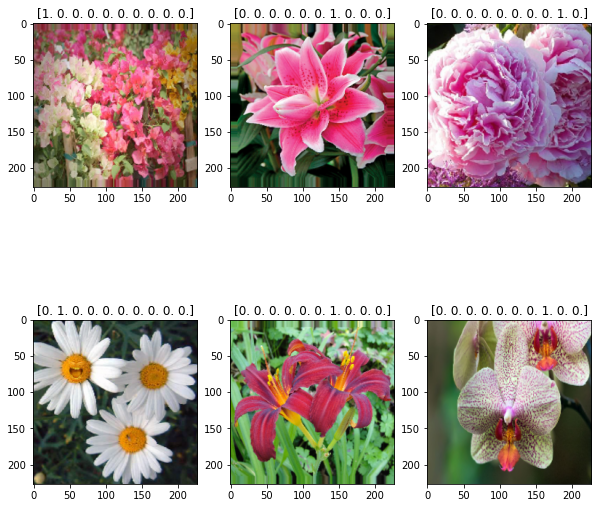

In [ ]:
#check out some Examples from the Dataset
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])

axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])

axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])

axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])

axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])

axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

#Build the model

In [ ]:
#AlexNet
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    X = Dropout(0.5)(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    X = Dropout(0.5)(X)
    
    X = Dense(10,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    return model

In [ ]:
alex_model = AlexNet(train[0][0].shape[1:])

In [ ]:
alex_model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
alex_model.fit_generator(train,epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
21/21 [==============================] - 400s 19s/step - loss: 27.8981 - accuracy: 0.1164
Epoch 2/100
21/21 [==============================] - 132s 6s/step - loss: 2.7538 - accuracy: 0.1269
Epoch 3/100
21/21 [==============================] - 135s 6s/step - loss: 2.2827 - accuracy: 0.1657
Epoch 4/100
21/21 [==============================] - 130s 6s/step - loss: 2.1247 - accuracy: 0.2224
Epoch 5/100
21/21 [==============================] - 130s 6s/step - loss: 2.0408 - accuracy: 0.2478
Epoch 6/100
21/21 [==============================] - 129s 6s/step - loss: 1.9726 - accuracy: 0.2537
Epoch 7/100
21/21 [==============================] - 130s 6s/step - loss: 1.9478 - accuracy: 0.2806
Epoch 8/100
21/21 [==============================] - 128s 6s/step - loss: 1.9440 - accuracy: 0.2731
Epoch 9/100
21/21 [==============================] - 129s 6s/step - loss: 1.8881 - accuracy: 0.3060
Epoch 10/100
21/21 [==============================] - 130s 6s/step - loss: 1.9665 - accuracy: 0.29

In [ ]:
alex_model.save("alex_model.h5")
#from keras.models import load_model
#model = load_model('alex_model.h5')

In [ ]:
preds = alex_model.evaluate_generator(validation)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Loss = 2.281748056411743
Test Accuracy = 0.4225352108478546
